In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [63]:
## Implementar a função que identifica a bandeira
## A função deve receber uma imagem e retornar a bandeira identificada
## A função deve retornar uma lista de tuplas no formato:
## [(PAIS, (x1, y1), (x2, y2)), (PAIS, (x1, y1), (x2, y2)), ...]

def identifica_bandeira(img):
    lista_bandeiras = []
    
    # Converter para HSV para melhor análise de cores
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Converter para escala de cinza e aplicar limiarização
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    
    # Encontrar contornos das possíveis bandeiras
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        # Filtrar objetos muito pequenos
        if w < 50 or h < 30:
            continue
        
        # Calcular a proporção da bandeira
        proporcao = w / h

        # Extrair a região de interesse (ROI)
        roi_hsv = hsv[y:y+h, x:x+w]

        # Dividir a bandeira em duas partes horizontais
        top = roi_hsv[:h//2, :]
        bottom = roi_hsv[h//2:, :]

        mean_top = np.mean(top, axis=(0, 1))  # Cor da parte superior
        mean_bottom = np.mean(bottom, axis=(0, 1))  # Cor da parte inferior

        # Verifica se é Peru (vermelho nas laterais, branco no centro)
        left = roi_hsv[:, :w//3]
        center = roi_hsv[:, w//3:2*w//3]
        right = roi_hsv[:, 2*w//3:]

        mean_left = np.mean(left, axis=(0, 1))
        mean_center = np.mean(center, axis=(0, 1))
        mean_right = np.mean(right, axis=(0, 1))

        if mean_left[2] > 100 and mean_right[2] > 100 and mean_center[1] < 50:
            pais = "peru"

        # Verifica se é Mônaco, Indonésia ou Singapura
        elif mean_top[0] > 150 and mean_bottom[0] < 50:  # Parte superior vermelha, inferior branca
            if 1.2 <= proporcao <= 1.35:  # Proporção de Mônaco (4:5)
                pais = "monaco"
            else:  # Indonésia tem proporção 2:3
                pais = "indonesia"

            # Detectar símbolos na parte vermelha (Singapura)
            top_gray = cv2.cvtColor(top, cv2.COLOR_HSV2BGR)
            top_gray = cv2.cvtColor(top_gray, cv2.COLOR_BGR2GRAY)
            _, top_thresh = cv2.threshold(top_gray, 200, 255, cv2.THRESH_BINARY)
            symbol_contours, _ = cv2.findContours(top_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            if len(symbol_contours) > 0:  # Se houver símbolos, é Singapura
                pais = "singapura"

        else:
            pais = "desconhecido"

        lista_bandeiras.append((pais, (x, y), (x+w, y+h)))

    return lista_bandeiras

In [58]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('peru', (192, 585), (457, 673)), ('peru', (726, 266), (984, 369)), ('peru', (206, 121), (293, 295))]


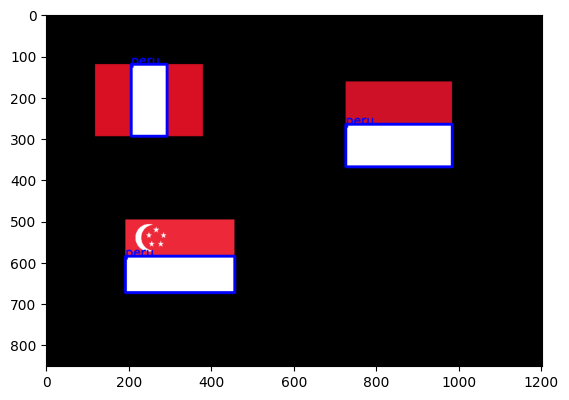

In [64]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
#img = cv2.imread('img/teste2.png')
#img = cv2.imread('img/teste3.png')
#img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()




[('peru', (192, 585), (457, 673)), ('peru', (726, 266), (984, 369)), ('peru', (206, 121), (293, 295))]


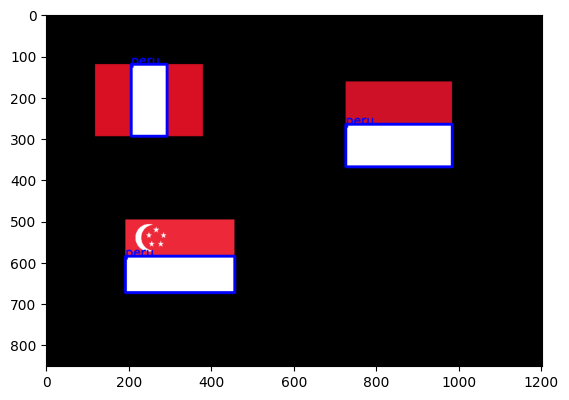

In [ ]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
#img = cv2.imread('img/teste2.png')
#img = cv2.imread('img/teste3.png')
#img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()


